# Import libs

In [25]:
import pandas as pd
import numpy as np
from knn.knn import knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [26]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Instantiating model

In [27]:
knn_model = knn(k=3, type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [28]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)

    hit_rate_list.append(knn_model.score(X_test, y_test))

    y_pred = [knn_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [29]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.7903225806451613, 0.7741935483870968, 0.7903225806451613, 0.8548387096774194, 0.7741935483870968, 0.8387096774193549, 0.8709677419354839, 0.8548387096774194, 0.8709677419354839, 0.7258064516129032, 0.8548387096774194, 0.8387096774193549, 0.8548387096774194, 0.8064516129032258, 0.7741935483870968, 0.8225806451612904, 0.7419354838709677, 0.8225806451612904, 0.8225806451612904, 0.7903225806451613]

Accuracy:
0.8137096774193548

Standard Deviation:
0.041271101877174164

Confusion Matrix:
[[ 9  7  0]
 [ 3 10  2]
 [ 0  1 30]]
[[12  5  0]
 [ 5 16  2]
 [ 1  1 20]]
[[ 6  4  0]
 [ 5 12  2]
 [ 0  2 31]]
[[ 9  7  0]
 [ 2 11  0]
 [ 0  0 33]]
[[ 6  1  0]
 [12  8  1]
 [ 0  0 34]]
[[ 7  4  0]
 [ 5 18  1]
 [ 0  0 27]]
[[ 6  2  0]
 [ 4 20  0]
 [ 1  1 28]]
[[ 7  3  0]
 [ 6 20  0]
 [ 0  0 26]]
[[ 6  3  0]
 [ 1 19  1]
 [ 1  2 29]]
[[ 8  7  0]
 [ 6 10  2]
 [ 0  2 27]]
[[10  4  0]
 [ 2 19  1]
 [ 0  2 24]]
[[ 6  4  0]
 [ 2 13  0]
 [ 2  2 33]]
[[ 6  6  0]
 [ 1 15  1]
 [ 0  1 32]]
[[ 9  3  0]
 [ 6 

# Choosing two columns from the last X_train and X_test to plot decision surface

In [30]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
19   41.73  12.25
183  71.00  37.52
286  61.73  17.11
302  54.60  21.49
307  61.45  22.69
..     ...    ...
184  81.06  20.80
31   46.39  11.08
275  67.29  16.72
75   70.22  39.82
206  95.48  46.55

[248 rows x 2 columns]
Test dataset:
         0      1
211  54.92  18.97
108  63.17   6.33
239  56.45  19.44
289  44.43  14.17
55   47.66  13.28
..     ...    ...
169  44.25   1.10
220  44.49  21.79
10   49.71  13.04
157  44.22   1.51
145  85.64  42.69

[62 rows x 2 columns]


# Training the model with the new dataset 2d

In [31]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting decision surface

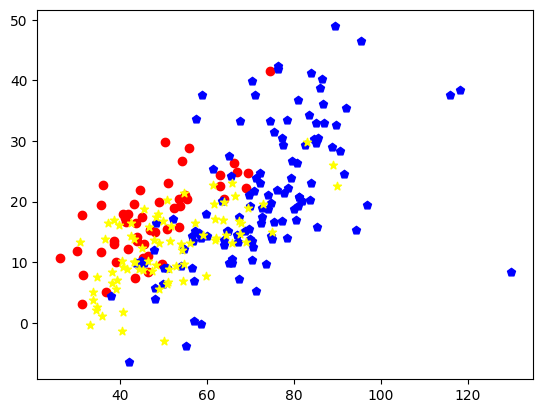

In [32]:
data = X_train_2d[:][:].values

x_ax = np.arange(data[:, 0].min(), data[:, 1].max())

dh = np.where(y_train == 'DH')
sl = np.where(y_train == 'SL')
no = np.where(y_train == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='blue', marker='p', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='yellow', marker='*', label='no')

plt.show()